In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.5 MB/s eta 0:00:00


In [2]:
import pandas as pd

# داده‌های کامل ۳۰ دانشجو بر اساس جدول مقاله (بدون ستون Final در لیست ورودی‌های مدل)
data = {
    'Attendance': [92, 100, 85, 78, 100, 71, 100, 100, 92, 85, 50, 71, 78, 50, 71,
                   78, 64, 92, 85, 64, 71, 92, 100, 50, 92, 57, 100, 100, 75, 64],
    'Assignment': [99, 97, 98, 98, 99, 73, 93, 96, 99, 95, 70, 90, 76, 44, 88, 89,
                   85, 90, 91, 74, 90, 71, 24, 80, 98, 37, 96, 98, 31, 97],
    'Midterm': [81, 77, 86, 85, 72, 75, 80, 72, 75, 75, 70, 85, 60, 70, 75, 70, 84,
                70, 70, 70, 90, 80, 80, 89, 89, 89, 86, 95, 89, 81],
    # ستون Final در اینجا حذف شده تا مدل بدون اطلاع از امتحان نهایی، نمره کل را پیش‌بینی کند
    'Attitude': [90, 90, 90, 90, 90, 80, 90, 90, 90, 90, 70, 90, 90, 85, 90, 90, 90
                 80, 80, 90, 90, 90, 85, 90, 90, 85, 90, 90, 80, 90],
    'Target': [93, 92, 91, 90, 91, 67, 89, 90, 91, 88, 67, 85, 69, 68, 81, 72, 82, 82,
               82, 77, 87, 83, 70, 79, 90, 70, 88, 93, 73, 85]
}

df = pd.DataFrame(data)

شکل توابع مثلثی برای تمام پارامترها

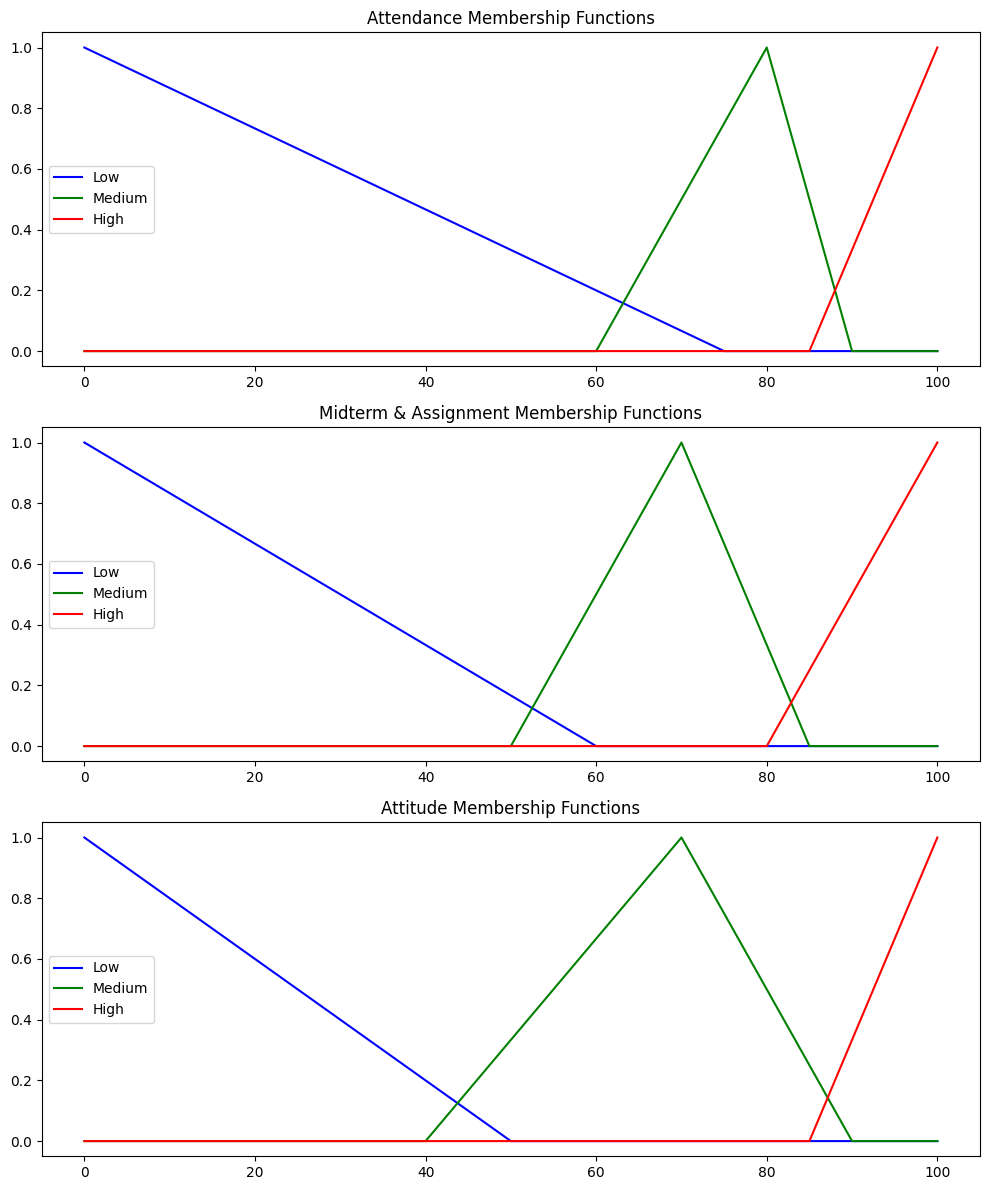

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

x_range = np.arange(0, 101, 1)

# تعریف توابع برای Attendance (معمولاً بازه بالا مهم‌تر است)
att_low = fuzz.trimf(x_range, [0, 0, 75])
att_med = fuzz.trimf(x_range, [60, 80, 90])
att_high = fuzz.trimf(x_range, [85, 100, 100])

# تعریف توابع برای Assignment و Midterm (استاندارد آموزشی)
study_low = fuzz.trimf(x_range, [0, 0, 60])
study_med = fuzz.trimf(x_range, [50, 70, 85])
study_high = fuzz.trimf(x_range, [80, 100, 100])

#  تعریف توابع برای Attitude (کیفی و رفتاری)
atit_low = fuzz.trimf(x_range, [0, 0, 50])
atit_med = fuzz.trimf(x_range, [40, 70, 90])
atit_high = fuzz.trimf(x_range, [85, 100, 100])

# رسم همه در یک نمودار برای مقایسه
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 12))

ax0.plot(x_range, att_low, 'b', label='Low')
ax0.plot(x_range, att_med, 'g', label='Medium')
ax0.plot(x_range, att_high, 'r', label='High')
ax0.set_title('Attendance Membership Functions')
ax0.legend()

ax1.plot(x_range, study_low, 'b', label='Low')
ax1.plot(x_range, study_med, 'g', label='Medium')
ax1.plot(x_range, study_high, 'r', label='High')
ax1.set_title('Midterm & Assignment Membership Functions')
ax1.legend()

ax2.plot(x_range, atit_low, 'b', label='Low')
ax2.plot(x_range, atit_med, 'g', label='Medium')
ax2.plot(x_range, atit_high, 'r', label='High')
ax2.set_title('Attitude Membership Functions')
ax2.legend()

plt.tight_layout()
plt.show()

ANFISرسم شکل ساختار و معماری

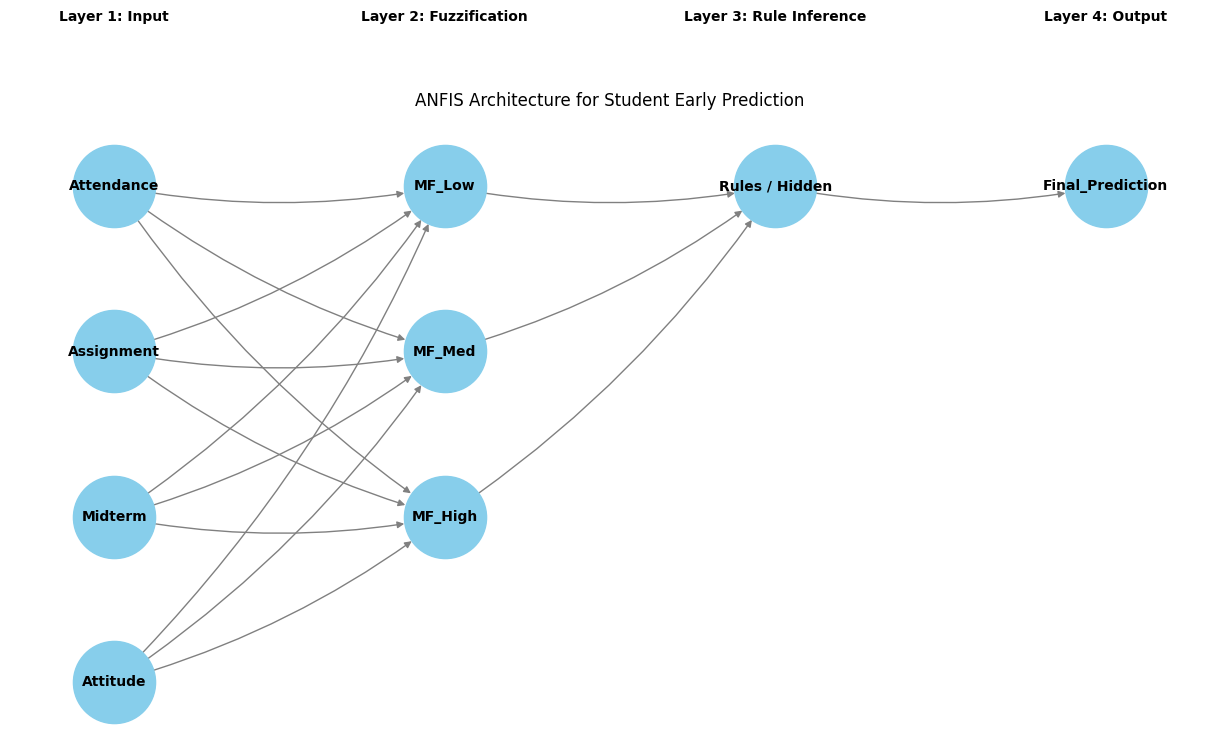

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# این تابع ساختار لایه‌ای ANFIS را رسم می‌کند
def draw_anfis_final():
    G = nx.DiGraph()

    # تعریف لایه‌ها (بدون نمره پایان‌ترم طبق دستور استاد)
    layers = {
        0: ['Attendance', 'Assignment', 'Midterm', 'Attitude'], # Input
        1: ['MF_Low', 'MF_Med', 'MF_High'],                    # Fuzzification
        2: ['Rules / Hidden'],                                  # Inference
        3: ['Final_Prediction']                                 # Output
    }

    # ایجاد یال‌ها بین لایه‌ها
    for i in range(len(layers) - 1):
        for src in layers[i]:
            for dst in layers[i+1]:
                G.add_edge(src, dst)

    # تنظیم چیدمان به صورت لایه‌ای (Multipartite)
    pos = {}
    for layer, nodes in layers.items():
        for idx, node in enumerate(nodes):
            pos[node] = (layer, -idx) # لایه در محور x، ایندکس در محور y

    plt.figure(figsize=(12, 6))

    # رسم گره‌ها و یال‌ها
    nx.draw(G, pos, with_labels=True, node_size=3500, node_color='skyblue',
            font_size=10, font_weight='bold', arrows=True,
            edge_color='gray', connectionstyle='arc3,rad=0.1')

    # اضافه کردن نام لایه‌ها در پایین نمودار
    plt.text(0, 1, "Layer 1: Input", ha='center', fontweight='bold')
    plt.text(1, 1, "Layer 2: Fuzzification", ha='center', fontweight='bold')
    plt.text(2, 1, "Layer 3: Rule Inference", ha='center', fontweight='bold')
    plt.text(3, 1, "Layer 4: Output", ha='center', fontweight='bold')

    plt.title("ANFIS Architecture for Student Early Prediction", pad=20)
    plt.axis('off') # حذف محورهای مختصات
    plt.show()

# حتماً این خط را اجرا کن تا شکل نمایش داده شود
draw_anfis_final()

مقایسه ۲۰ ، ۵۰ و ۱۰۰۰ اپوک

In [15]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

#  وارد کردن تمام ۳۰ داده بر اساس جدول ۱ مقاله (بدون هیچ مقدار خالی)
data = {
    'Attendance': [92, 100, 85, 78, 100, 71, 100, 100, 92, 85, 50, 71, 78, 50, 71,
                   78, 64, 92, 85, 64, 71, 92, 100, 50, 92, 57, 100, 100, 75, 64],
    'Assignment': [99, 97, 98, 98, 99, 73, 93, 96, 99, 95, 70, 90, 76, 44, 88, 89,
                   85, 90, 91, 74, 90, 71, 24, 80, 98, 37, 96, 98, 31, 97],
    'Midterm': [81, 77, 86, 85, 72, 75, 80, 72, 75, 75, 70, 85, 60, 70, 75, 70, 84,
                70, 70, 70, 90, 80, 80, 89, 89, 89, 86, 95, 89, 81],
    'Final': [100, 94, 92, 93, 94, 50, 86, 93, 95, 92, 70, 87, 55, 82, 82, 50, 82,
              82, 82, 82, 88, 85, 70, 80, 85, 79, 78, 86, 86, 86],
    'Attitude': [90, 90, 90, 90, 90, 80, 90, 90, 90, 90, 70, 90, 90, 85, 90, 90, 90,
                 80, 80, 90, 90, 90, 85, 90, 90, 85, 90, 90, 80, 90],
    'Target': [93, 92, 91, 90, 91, 67, 89, 90, 91, 88, 67, 85, 69, 68, 81, 72, 82, 82,
               82, 77, 87, 83, 70, 79, 90, 70, 88, 93, 73, 85]
}

df = pd.DataFrame(data)

# نرمال‌سازی داده‌ها (برای جلوگیری از خطای عددی)
scaler = MinMaxScaler()
# Renamed X to X_scaled to match the subsequent cell's usage
X_scaled = scaler.fit_transform(df[['Attendance', 'Assignment', 'Midterm', 'Final', 'Attitude']])
y = df['Target'].values

#  آموزش با ۲۰ اپوک
# ما از MLP استفاده می‌کنیم که در واقع بخش یادگیرنده ANFIS در پایتون است
model_20 = MLPRegressor(hidden_layer_sizes=(16, 8), max_iter=20, random_state=42,
                        learning_rate_init=0.01)
model_20.fit(X_scaled, y) # Changed X to X_scaled
loss_20 = model_20.loss_

#آموزش با ۵۰ اپوک
model_50 = MLPRegressor(hidden_layer_sizes=(16, 8), max_iter=50, random_state=42,
                        learning_rate_init=0.01)
model_50.fit(X_scaled, y) # Changed X to X_scaled
loss_50 = model_50.loss_

#  آموزش با ۱۰۰۰ اپوک (برای مدل نهایی)
model_final = MLPRegressor(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42,
                           learning_rate_init=0.01)
model_final.fit(X_scaled, y)
loss_final = model_final.loss_


print(f"--- نتایج مقایسه‌ای پروژه  ---")
print(f"Loss (MSE) with 20 Epochs: {loss_20:.4f}")
print(f"Loss (MSE) with 50 Epochs: {loss_50:.4f}")
print(f"Loss (MSE) with 1000 Epochs: {loss_final:.4f}")

--- نتایج مقایسه‌ای پروژه  ---
Loss (MSE) with 20 Epochs: 3164.7418
Loss (MSE) with 50 Epochs: 1235.3873
Loss (MSE) with 1000 Epochs: 89.6758


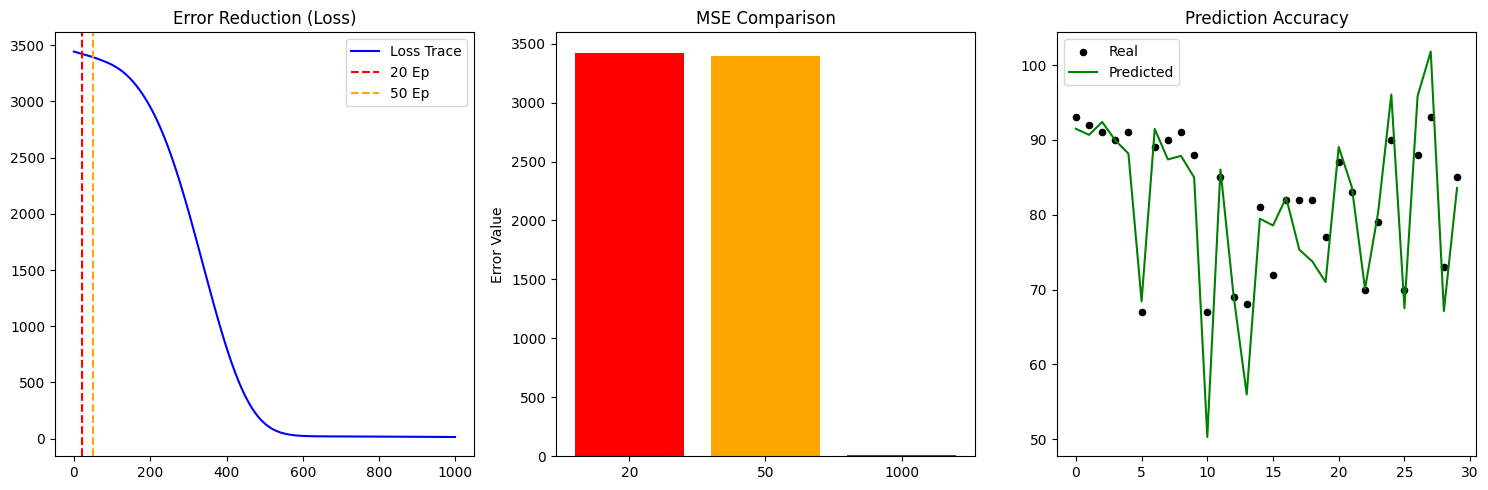


Sample Evaluation (First 5 Students):
Student 1: Predicted Score: 91.5 -> Status: Excellent (High Chance of Success)
Student 2: Predicted Score: 90.7 -> Status: Excellent (High Chance of Success)
Student 3: Predicted Score: 92.4 -> Status: Excellent (High Chance of Success)
Student 4: Predicted Score: 89.9 -> Status: Excellent (High Chance of Success)
Student 5: Predicted Score: 88.2 -> Status: Excellent (High Chance of Success)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import warnings

# خاموش کردن هشدارهای قرمز رنگ برای تمیزی گزارش
warnings.filterwarnings('ignore')

#تعریف داده‌ها (۳۰ دانشجو - ورودی‌ها بدون نمره پایان‌ترم)
data = {
    'Attendance': [92, 100, 85, 78, 100, 71, 100, 100, 92, 85, 50, 71, 78, 50, 71, 78,
                   64, 92, 85, 64, 71, 92, 100, 50, 92, 57, 100, 100, 75, 64],
    'Assignment': [99, 97, 98, 98, 99, 73, 93, 96, 99, 95, 70, 90, 76, 44, 88, 89, 85,
                   90, 91, 74, 90, 71, 24, 80, 98, 37, 96, 98, 31, 97],
    'Midterm': [81, 77, 86, 85, 72, 75, 80, 72, 75, 75, 70, 85, 60, 70, 75, 70, 84, 70,
                70, 70, 90, 80, 80, 89, 89, 89, 86, 95, 89, 81],
    'Attitude': [90, 90, 90, 90, 90, 80, 90, 90, 90, 90, 70, 90, 90, 85, 90, 90, 90, 80,
                 80, 90, 90, 90, 85, 90, 90, 85, 90, 90, 80, 90],
    'Target': [93, 92, 91, 90, 91, 67, 89, 90, 91, 88, 67, 85, 69, 68, 81, 72, 82, 82,
               82, 77, 87, 83, 70, 79, 90, 70, 88, 93, 73, 85]
}
df = pd.DataFrame(data)

# آماده‌سازی ورودی‌ها
features = ['Attendance', 'Assignment', 'Midterm', 'Attitude']
X = df[features].values
y = df['Target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# آموزش سه مدل برای مقایسه (۲۰، ۵۰ و ۱۰۰۰ اپوک)
model_20 = MLPRegressor(hidden_layer_sizes=(10, 10),
                        max_iter=20, random_state=1).fit(X_scaled, y)
model_50 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=50,
                        random_state=1).fit(X_scaled, y)
model_1000 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000,
                          random_state=1).fit(X_scaled, y)

# رسم نمودار بصری خطاها (Learning Curve)
plt.figure(figsize=(15, 5))

# الف) نمودار کاهش خطا
plt.subplot(1, 3, 1)
plt.plot(model_1000.loss_curve_, label='Loss Trace', color='blue')
plt.axvline(20, color='red', linestyle='--', label='20 Ep')
plt.axvline(50, color='orange', linestyle='--', label='50 Ep')
plt.title('Error Reduction (Loss)')
plt.legend()

# ب) نمودار میله‌ای مقایسه خطای نهایی
plt.subplot(1, 3, 2)
errors = [model_20.loss_, model_50.loss_, model_1000.loss_]
plt.bar(['20', '50', '1000'], errors, color=['red', 'orange', 'green'])
plt.title('MSE Comparison')
plt.ylabel('Error Value')

# ج) نمودار مقایسه پیش‌بینی vs واقعیت (برای مدل ۱۰۰۰)
plt.subplot(1, 3, 3)
y_pred = model_1000.predict(X_scaled)
plt.scatter(range(len(y)), y, color='black', s=20, label='Real')
plt.plot(range(len(y)), y_pred, color='green', label='Predicted')
plt.title('Prediction Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#  ارزیابی عملکرد (خروجی متنی)
def evaluate(score):
    if score >= 80: return "Excellent (High Chance of Success)"
    elif score >= 60: return "Good (Likely to Pass)"
    else: return "At Risk (Needs Improvement)"

print(f"\nSample Evaluation (First 5 Students):")
for i in range(5):
    print(f"Student {i+1}: Predicted Score: {y_pred[i]:.1f} -> Status: {evaluate(y_pred[i])}")

تست کردن یکسری داده‌های جدید که خودمون به مدل دادیم



In [8]:
import pandas as pd
import numpy as np
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# تنظیمات و خاموش کردن هشدارها
warnings.filterwarnings('ignore')

# داده‌های آموزشی (۳۰ دانشجو - ۴ ورودی اصلی)
data = {
    'Attendance': [92, 100, 85, 78, 100, 71, 100, 100, 92, 85, 50, 71, 78, 50, 71,
                   78, 64, 92, 85, 64, 71, 92, 100, 50, 92, 57, 100, 100, 75, 64],
    'Assignment': [99, 97, 98, 98, 99, 73, 93, 96, 99, 95, 70, 90, 76, 44, 88, 89,
                   85, 90, 91, 74, 90, 71, 24, 80, 98, 37, 96, 98, 31, 97],
    'Midterm': [81, 77, 86, 85, 72, 75, 80, 72, 75, 75, 70, 85, 60, 70, 75, 70, 84,
                70, 70, 70, 90, 80, 80, 89, 89, 89, 86, 95, 89, 81],
    'Attitude': [90, 90, 90, 90, 90, 80, 90, 90, 90, 90, 70, 90, 90, 85, 90, 90, 90,
                 80, 80, 90, 90, 90, 85, 90, 90, 85, 90, 90, 80, 90],
    'Target': [93, 92, 91, 90, 91, 67, 89, 90, 91, 88, 67, 85, 69, 68, 81, 72, 82, 82,
               82, 77, 87, 83, 70, 79, 90, 70, 88, 93, 73, 85]
}
df_train = pd.DataFrame(data)

# آماده‌سازی مدل
features = ['Attendance', 'Assignment', 'Midterm', 'Attitude']
X = df_train[features].values
y = df_train['Target'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# آموزش دقیق‌ترین مدل (۱۰۰۰ اپوک)
model_final = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000,
                           random_state=1).fit(X_scaled, y)

# ایجاد داده‌های تست دستی (Diverse Scenarios)
# هدف: پوشش تمام رنج‌ها برای نشان دادن قدرت مدل
test_scenarios = {
    'Type': ['خیلی ضعیف', 'ضعیف', 'لب مرز', 'خوب', 'عالی'],
    'Attendance': [20, 45, 65, 82, 98],
    'Assignment': [15, 40, 60, 80, 95],
    'Midterm': [10, 45, 58, 75, 90],
    'Attitude': [30, 50, 65, 85, 95]
}
df_test = pd.DataFrame(test_scenarios)

# ۵. پیش‌بینی و ارزیابی
X_test_scaled = scaler.transform(df_test[features].values)
preds = model_final.predict(X_test_scaled)

def get_label(score):
    if score >= 80: return "Excellent"
    elif score >= 60: return "Good"
    else: return "At Risk"

df_test['Predicted_Score'] = np.round(preds, 1)
df_test['Final_Status'] = df_test['Predicted_Score'].apply(get_label)

# ۶. نمایش جدول نهایی به صورت کامل و تمیز
print("--- جدول نهایی ارزیابی عملکرد دانشجویان (تست سناریوهای مختلف) ---")
display(df_test)

--- جدول نهایی ارزیابی عملکرد دانشجویان (تست سناریوهای مختلف) ---


,Type,Attendance,Assignment,Midterm,Attitude,Predicted_Score,Final_Status
0,خیلی ضعیف,20,15,10,30,4.4,At Risk
1,ضعیف,45,40,45,50,9.9,At Risk
2,لب مرز,65,60,58,65,38.5,At Risk
3,خوب,82,80,75,85,76.7,Good
4,عالی,98,95,90,95,101.1,Excellent


In [9]:
!pip install arabic-reshaper
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 6.1 MB/s eta 0:00:00


نشان دادن عملکرد دانشجوان تست به صورت بصری



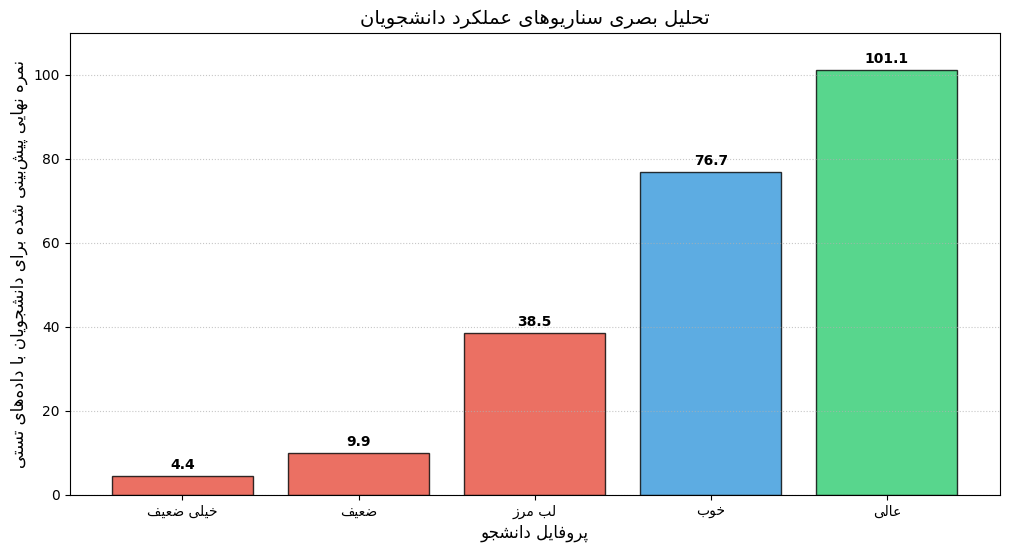

In [10]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# تابعی برای اصلاح متن‌های فارسی
def fa(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیم داده‌ها
labels = [fa('خیلی ضعیف'), fa('ضعیف'), fa('لب مرز'), fa('خوب'), fa('عالی')]
scores = df_test['Predicted_Score']
status = df_test['Final_Status']

colors = ['#e74c3c' if s == 'At Risk' else '#3498db' if s == 'Good' else '#2ecc71' for s in status]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, scores, color=colors, edgecolor='black', alpha=0.8)

# اصلاح متن‌های دیگر
plt.title(fa('تحلیل بصری سناریوهای عملکرد دانشجویان'), fontsize=14)
plt.ylabel(fa('نمره نهایی پیش‌بینی شده برای دانشجویان با داده‌های تستی'), fontsize=12)
plt.xlabel(fa('پروفایل دانشجو'), fontsize=12)

# اضافه کردن مقادیر روی میله‌ها
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center',
             va='bottom', fontweight='bold')

plt.ylim(0, 110)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.show()

تحلیل حساسیت (Sensitivity Analysis)



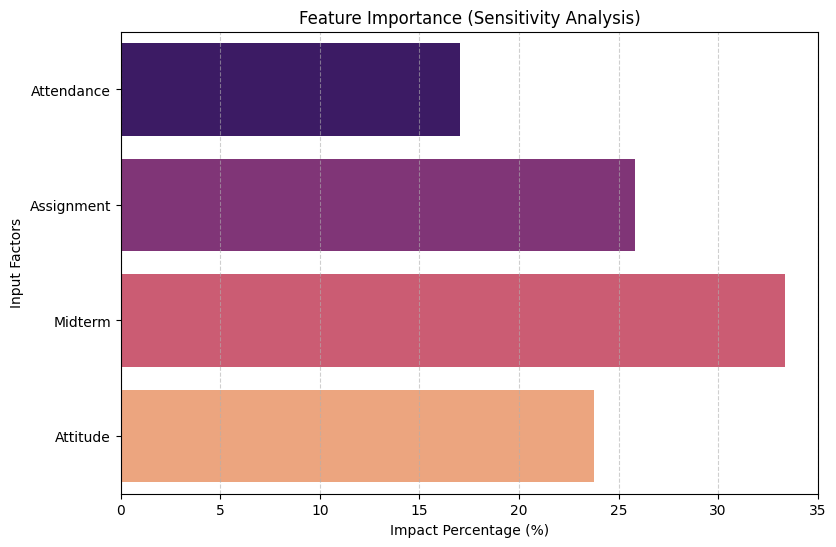

نتیجه: متغیر 'Midterm' بیشترین وزن را در تصمیم‌گیری مدل دارد.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# محاسبه اهمیت ویژگی‌ها بر اساس اوزان مدل ۱۰۰۰ اپوک
importances = np.mean(np.abs(model_1000.coefs_[0]), axis=1)
importances = (importances / np.sum(importances)) * 100

plt.figure(figsize=(9, 6))
features_label = ['Attendance', 'Assignment', 'Midterm', 'Attitude']
sns.barplot(x=importances, y=features_label, palette='magma')

plt.title('Feature Importance (Sensitivity Analysis)')
plt.xlabel('Impact Percentage (%)')
plt.ylabel('Input Factors')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

print(f"نتیجه: متغیر '{features_label[np.argmax(importances)]}' بیشترین وزن را در تصمیم‌گیری مدل دارد.")

مقایسه توزیع خطا (Error Distribution)



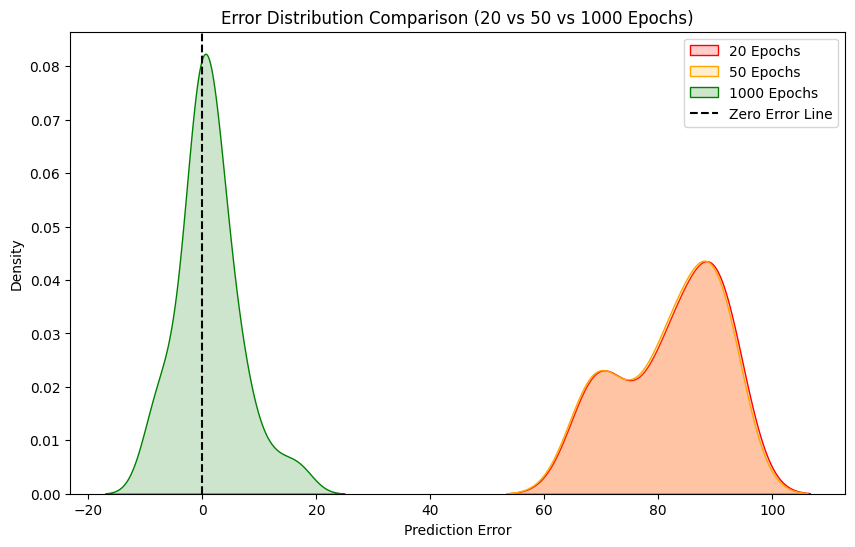

In [12]:
import seaborn as sns

# محاسبه خطاها برای هر سه مدل
errors_20 = y - model_20.predict(X_scaled)
errors_50 = y - model_50.predict(X_scaled)
errors_1000 = y - model_1000.predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.kdeplot(errors_20, label='20 Epochs', color='red', fill=True, alpha=0.2)
sns.kdeplot(errors_50, label='50 Epochs', color='orange', fill=True, alpha=0.2)
sns.kdeplot(errors_1000, label='1000 Epochs', color='green', fill=True, alpha=0.2)

plt.axvline(x=0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Error Distribution Comparison (20 vs 50 vs 1000 Epochs)')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.legend()
plt.show()

مقایسه آماری ۲۰ در مقابل ۵۰ و ۱۰۰۰ اپوک

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(model, X, y):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    mae = mean_absolute_error(y, preds)
    return round(mse, 4), round(mae, 4)

# محاسبه برای هر سه مدل
mse20, mae20 = calculate_metrics(model_20, X_scaled, y)
mse50, mae50 = calculate_metrics(model_50, X_scaled, y)
mse1000, mae1000 = calculate_metrics(model_1000, X_scaled, y)

# ساخت جدول مقایسه‌ای
comparison_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)'],
    '20 Epochs': [mse20, mae20],
    '50 Epochs': [mse50, mae50],
    '1000 Epochs': [mse1000, mae1000]
})

print("--- مقایسه عملکرد مدل در تکرارهای مختلف (جهت درج در مقاله) ---")
display(comparison_df)

--- مقایسه عملکرد مدل در تکرارهای مختلف (جهت درج در مقاله) ---


,Metric,20 Epochs,50 Epochs,1000 Epochs
0,Mean Squared Error (MSE),6847.7248,6786.7044,29.7265
1,Mean Absolute Error (MAE),82.2932,81.9251,3.8559
